In [25]:
from soft_dtw.soft_dtw import SoftDTW
import torch

from IPython.display import Audio, Image
from torchvision.transforms import ToPILImage
import numpy as np
import torch
import torch.nn as nn
import unittest
import time
import matplotlib.pyplot as plt
from torch.optim import Adam

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

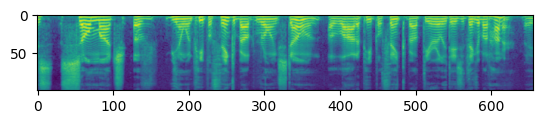

In [27]:
mel_spectro_path  = '/Users/tarassereda/data/youtube-media/test-data/VLND2ptAOio.clip.24000.mel'
mel_spectro = torch.load(mel_spectro_path)

plt.imshow(mel_spectro)

In [34]:
def plot_spectro(spectro):
    assert spectro.ndim == 2
    plt.imshow(spectro.detach().cpu().numpy())
    plt.show()
    

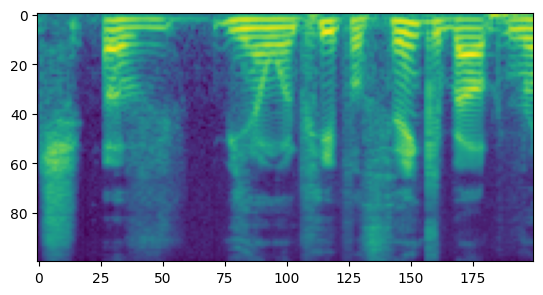

In [50]:
plot_spectro(a_cpu[0].T)

In [ ]:
tol_backward = 1e-6
sdtw = SoftDTW(use_cuda=False, gamma=10, bandwidth=1, normalize=True)
n_iters = 12_000

times_cpu = []

b_cpu = mel_spectro.unsqueeze(0)
b_cpu = b_cpu.transpose(2, 1)[:, 100:300, :]

plot_spectro(b_cpu[0].T)

batch_size, seq_len_a, dims = b_cpu.shape
a_cpu = torch.rand((batch_size, seq_len_a, dims), requires_grad=True)
criterion = Adam([a_cpu], lr=1e-3)
for i in range(n_iters):
    # CPU
    loss = sdtw(a_cpu, b_cpu)
    loss = loss / (seq_len_a * dims)
    criterion.zero_grad()
    loss.backward()
    criterion.step()
    if i % 500 == 0:

        print(i, loss)
        plot_spectro(a_cpu[0].T)